In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from scipy import stats
import pandas as pd
from matplotlib.dates import DateFormatter
from pylab import rcParams
import pprint
# %matplotlib notebook

In [2]:
csv1 = "2020_US_Region_Mobility_Report.csv"
csv2 = "2020_US_Region_Mobility_Report2.csv"
df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

In [3]:
main = pd.concat([df1, df2])
main.head()

,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,United States,NaN,NaN,2/15/2020,6.0,2.0,15.0,3.0,2.0,-1.0
1,United States,NaN,NaN,2/16/2020,7.0,1.0,16.0,2.0,0.0,-1.0
2,United States,NaN,NaN,2/17/2020,6.0,0.0,28.0,-9.0,-24.0,5.0
3,United States,NaN,NaN,2/18/2020,0.0,-1.0,6.0,1.0,0.0,1.0
4,United States,NaN,NaN,2/19/2020,2.0,0.0,8.0,1.0,1.0,0.0


In [4]:
merged_df = main.rename(columns={"sub_region_2":"County",
                                      "date":"Date",
                                      "retail_and_recreation_percent_change_from_baseline":"Retail and Recreation",
                                      "grocery_and_pharmacy_percent_change_from_baseline":"Grocery and Pharmacy",
                                      "parks_percent_change_from_baseline":"Parks",
                                      "transit_stations_percent_change_from_baseline":"Transit Stations",
                                      "workplaces_percent_change_from_baseline":"Workplaces",
                                      "residential_percent_change_from_baseline":"Residential"
})
merged_df = merged_df.drop(columns=["country_region"])
merged_df = merged_df.drop(columns=["sub_region_1"])

In [5]:
merged_df.head()

,County,Date,Retail and Recreation,Grocery and Pharmacy,Parks,Transit Stations,Workplaces,Residential
0,NaN,2/15/2020,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,2/16/2020,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,2/17/2020,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,2/18/2020,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,2/19/2020,2.0,0.0,8.0,1.0,1.0,0.0


In [6]:
# city_group = merged_df.groupby('County')
merged_df = merged_df.loc[(merged_df['Date'] < "8/16/2020")]
merged_df = merged_df.loc[(merged_df['Date'] > "3/18/2020")]
rr_group = merged_df.groupby('Date')['Retail and Recreation'].mean()
date_group = merged_df.groupby('Date').mean()
date_df = pd.DataFrame(date_group).reset_index()
date_df.head()
# places_avg, = plt.plot(places, avg_rr, color="blue")
# plt.show()

,Date,Retail and Recreation,Grocery and Pharmacy,Parks,Transit Stations,Workplaces,Residential
0,3/19/2020,-22.664532,11.757743,9.753363,-14.288372,-24.385940,12.321481
1,3/2/2020,10.576843,5.771393,12.113235,3.237817,3.575713,-0.453003
2,3/20/2020,-27.620449,9.574172,10.107923,-17.891089,-25.933914,14.070533
3,3/21/2020,-33.574950,5.115432,12.144291,-18.246349,-18.551803,10.472081
4,3/22/2020,-36.761181,-6.414029,5.188045,-25.320162,-26.301994,9.968300


In [7]:
rcParams['figure.figsize'] = 20, 10

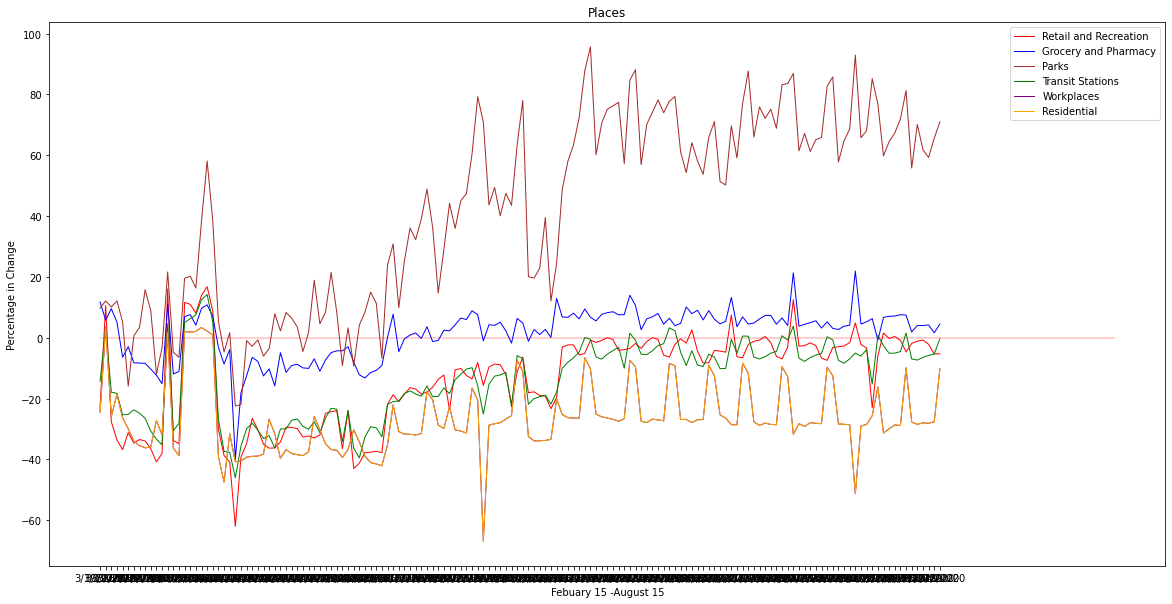

In [8]:
r_r = date_df["Retail and Recreation"]
g_p = date_df["Grocery and Pharmacy"]
prks = date_df["Parks"]
t_s = date_df["Transit Stations"]
w_p = date_df["Workplaces"]
rd = date_df["Residential"]
date = date_df["Date"]
rr, = plt.plot(date, r_r, color="red", label="Retail and Recreation", linewidth=1)
gp, = plt.plot(date, g_p, color="blue", label="Grocery and Pharmacy", linewidth=1)
prk, = plt.plot(date, prks, color="brown", label="Parks", linewidth=1)
ts, = plt.plot(date, t_s, color="green", label="Transit Stations", linewidth=1)
wp, = plt.plot(date, w_p, color="purple", label="Workplaces", linewidth=1)
rd, = plt.plot(date, w_p, color="orange", label="Residential", linewidth=1)
plt.title("Places")
plt.xlabel("Febuary 15 -August 15")
plt.ylabel("Percentage in Change")
plt.legend(loc="best")
plt.hlines(0, 0, 180, alpha=0.25,color='r')
# plt.savefig("places.png")
plt.show()

In [9]:
merged_df2 = main.rename(columns={"sub_region_1":"State",
                                  "sub_region_2":"County",
                                  "date":"Date",
                                  "retail_and_recreation_percent_change_from_baseline":"Retail and Recreation",
                                  "grocery_and_pharmacy_percent_change_from_baseline":"Grocery and Pharmacy",
                                  "parks_percent_change_from_baseline":"Parks",
                                  "transit_stations_percent_change_from_baseline":"Transit Stations",
                                  "workplaces_percent_change_from_baseline":"Workplaces",
                                  "residential_percent_change_from_baseline":"Residential"
})
merged_df2 = merged_df2.drop(columns=["country_region"])
merged_df2 = merged_df2.loc[(merged_df2['Date'] < "8/16/2020")]
merged_df2 = merged_df2.loc[(merged_df2['Date'] > "3/18/2020")]
county_df= pd.DataFrame(merged_df2)
# county_df
# ['Retail and Recreation'].mean()
# date_group = merged_df.groupby('Date').mean()
# rr_group2 = pd.DataFrame(rr_group2).reset_index()
# rr_group2.head()
# merged_df = merged_df.loc[(merged_df['Date'] < "8/16/2020")]
# rr_group = merged_df.groupby('Date')['Retail and Recreation'].mean()
# date_group = merged_df.groupby('Date').mean()
# date_df = pd.DataFrame(date_group).reset_index()
# date_df

In [10]:
plt.clf()
plt.cla()
plt.close()
state_input = []
del state_input

state_list = county_df['State'].dropna()
state_list = state_list.unique()

for state in state_list:
    print(state)

state_input = input("Which State would you like? ")

if state_input in state_list:     
    print("**********************I love "+ state_input + "**********************")

else: 
    print("Error - Try Again")
    county_input = input("Enter the State: ")
    if state_input in state_list:     
        print("**********************I love "+ state_input + "**********************")

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
Which State would you like? California
**********************I love California**********************


In [11]:
county_df = county_df.loc[(county_df['State'] == state_input)]
county_list = county_df['County'].dropna()
county_list = county_list.unique()

for county in county_list:
    print(county)
    
county_input = input("Enter the County: ")

if county_input in county_list:
    print(county_input + " " + state_input )
    
else: 
    print("Error - Try Again")
    county_input = input("Enter the County: ")

Alameda County
Amador County
Butte County
Calaveras County
Colusa County
Contra Costa County
Del Norte County
El Dorado County
Fresno County
Glenn County
Humboldt County
Imperial County
Inyo County
Kern County
Kings County
Lake County
Lassen County
Los Angeles County
Madera County
Marin County
Mariposa County
Mendocino County
Merced County
Modoc County
Mono County
Monterey County
Napa County
Nevada County
Orange County
Placer County
Plumas County
Riverside County
Sacramento County
San Benito County
San Bernardino County
San Diego County
San Francisco County
San Joaquin County
San Luis Obispo County
San Mateo County
Santa Barbara County
Santa Clara County
Santa Cruz County
Shasta County
Siskiyou County
Solano County
Sonoma County
Stanislaus County
Sutter County
Tehama County
Trinity County
Tulare County
Tuolumne County
Ventura County
Yolo County
Yuba County
Enter the County: San Diego County
San Diego County California


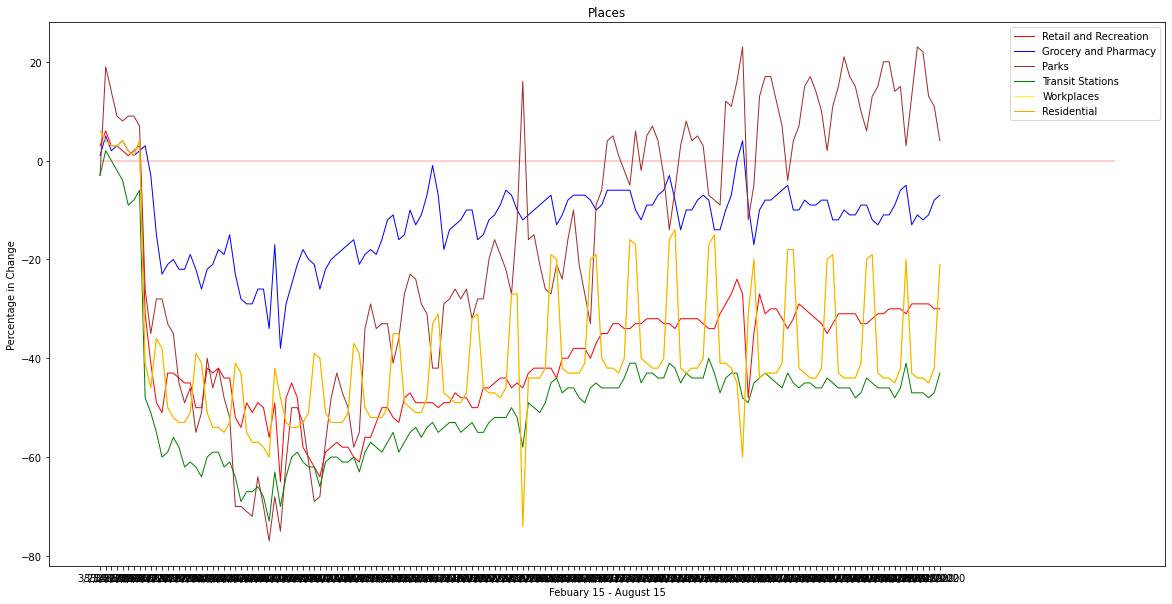

In [12]:
county_df = county_df.loc[(county_df['State'] == state_input)]
county_df = county_df.loc[(county_df['County'] == county_input)]
r_r = county_df["Retail and Recreation"]
g_p = county_df["Grocery and Pharmacy"]
prks = county_df["Parks"]
t_s = county_df["Transit Stations"]
w_p = county_df["Workplaces"]
rd = county_df["Residential"]
date = county_df["Date"]
rr, = plt.plot(date, r_r, color="red", label="Retail and Recreation", linewidth=1)
gp, = plt.plot(date, g_p, color="blue", label="Grocery and Pharmacy", linewidth=1)
prk, = plt.plot(date, prks, color="brown", label="Parks", linewidth=1)
ts, = plt.plot(date, t_s, color="green", label="Transit Stations", linewidth=1)
wp, = plt.plot(date, w_p, color="yellow", label="Workplaces", linewidth=1)
rd, = plt.plot(date, w_p, color="orange", label="Residential", linewidth=1)
plt.title("Places")
plt.xlabel("Febuary 15 - August 15")
plt.ylabel("Percentage in Change")
plt.legend(loc="best")
plt.hlines(0, 0, 180, alpha=0.25,color='r')
# plt.savefig("Google_Places_" + state_input + " " + county_input + ".png")
plt.show()